<a href="https://colab.research.google.com/github/silveirafatup-maker/DIO/blob/main/calculo_metricas_avaliacao_aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Cálculo de Métricas de Avaliação de Aprendizado

In [57]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_curve,
    auc
)
import seaborn as sns # melhorar aparencia da matriz de confusão


carrega MNIST - 10 classes

In [58]:
print("Carregando e Preparando os Dados MNIST")

# Carrega o conjunto de dados MNIST (10 classes: dígitos de 0 a 9)
# imagens (X), rótulos (y)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


Carregando e Preparando os Dados MNIST


In [59]:
# Normaliza os dados
# divide por 255 para que os valores fiquem entre 0 e 1
X = X / 255.0

# Converte os rótulos (y) para números inteiros
y = y.astype(int)

# Divide os dados: 60% para TREINAMENTO e 40% para TESTE
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# visualiza
print(f"Dados de Treinamento: {len(X_treino)} amostras")
print(f"Dados de Teste (Avaliação): {len(X_teste)} amostras")

Dados de Treinamento: 42000 amostras
Dados de Teste (Avaliação): 28000 amostras


Treinando o Modelo de Classificação

In [48]:
# Regressão Logística: modelo simples e robusto
modelo = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# treinamento do modelo
modelo.fit(X_treino, y_treino)

# fazer previsões nos dados de teste
y_predito = modelo.predict(X_teste)


Matriz de Confusão

In [49]:
# A Matriz de Confusão compara o que o modelo PREDIZ (y_predito)
# com o que é REAL (y_teste)
matriz_conf = confusion_matrix(y_teste, y_predito)

print("Matriz de Confusão (Classes 0 a 9):")
print(matriz_conf)


Matriz de Confusão (Classes 0 a 9):
[[2663    1   11    5   12   31   24    9   18    4]
 [   0 3081    9   15    4   14    3    5   24    4]
 [  19   33 2510   37   25   22   46   36   61   17]
 [  18   14   62 2518    2   98   12   27   48   30]
 [  11   11   14    4 2462    7   18    8   20   93]
 [  17   15   18   85   15 2253   43   12   65   21]
 [  14    6   37    4   27   35 2633    2    8    0]
 [  10   14   49   13   25   11    1 2776    8   78]
 [  18   46   33   77   16   78   23   12 2315   47]
 [  17   18    9   26   65   15    1   92   26 2551]]


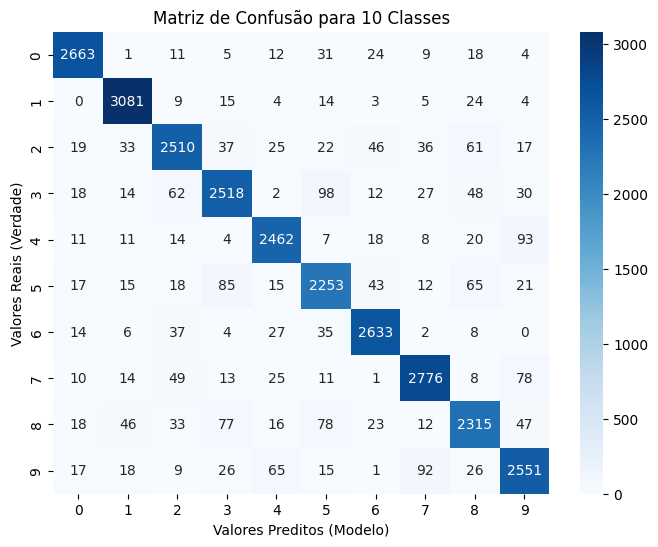

In [50]:
# matriz de confusão de forma mais clara
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_conf,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=modelo.classes_,
    yticklabels=modelo.classes_
)
plt.title('Matriz de Confusão para 10 Classes')
plt.ylabel('Valores Reais (Verdade)')
plt.xlabel('Valores Preditos (Modelo)')
plt.show()


#Cálculo das Métricas


In [51]:
# ACURÁCIA
# É a porcentagem total de previsões corretas (acertos / total de previsões)
acuracia = accuracy_score(y_teste, y_predito)
print(f"Acurácia (Geral): {acuracia:.4f}")


Acurácia (Geral): 0.9201


In [52]:
# SENSIBILIDADE (Recall)
# De todos os que deveriam ter sido classificados como 'X', quantos o modelo
# acertou.
sensibilidade = recall_score(y_teste, y_predito, average='weighted')
print(f"Sensibilidade (Recall) Média: {sensibilidade:.4f}")


Sensibilidade (Recall) Média: 0.9201


In [53]:
# PRECISÃO (Precision)
# De todos os que o modelo classificou como 'X', quantos estavam realmente
# corretos
precisao = precision_score(y_teste, y_predito, average='weighted')
print(f"Precisão Média: {precisao:.4f}")


Precisão Média: 0.9199


In [54]:
# F1-SCORE
# É a Média Harmônica (um meio-termo) entre Precisão e Sensibilidade.
# útil quando queremos equilibrar as duas métricas
f1 = f1_score(y_teste, y_predito, average='weighted')
print(f"F1-Score Média: {f1:.4f}")


F1-Score Média: 0.9199


#Curva ROC (Simplificada para Binário)

A Curva ROC e o AUC (Area Under the Curve) são normalmente usados em
problemas BINÁRIOS (apenas 2 classes).
Simplificar para avaliar apenas a classe '0' (dígito zero)
contra todas as outras classes (1 a 9).


In [55]:
# Converte o problema para BINÁRIO.
y_teste_binario = (y_teste == 0).astype(int)

# Pega a probabilidade do modelo prever a classe 0
y_prob_binario = modelo.predict_proba(X_teste)[:, 0]

# Calcula os valores para a Curva ROC
fpr, tpr, thresholds = roc_curve(y_teste_binario, y_prob_binario)

# Calcula a Área Sob a Curva (AUC): quanto maior, melhor
area_sob_curva = auc(fpr, tpr)


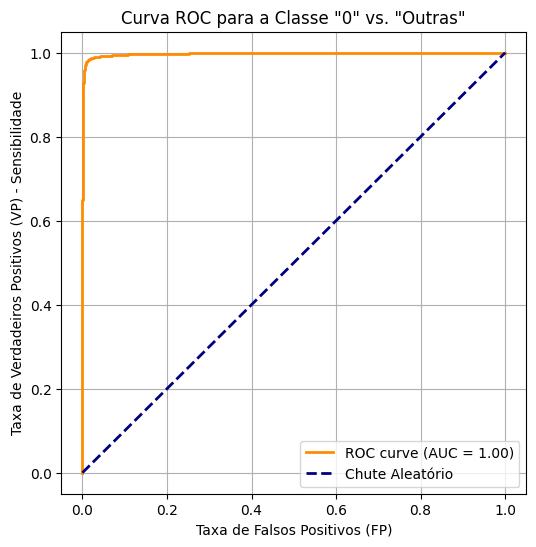

In [56]:
# Plota a Curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {area_sob_curva:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chute Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FP)')
plt.ylabel('Taxa de Verdadeiros Positivos (VP) - Sensibilidade')
plt.title('Curva ROC para a Classe "0" vs. "Outras"')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Resumo

Neste código:

1.  **Carregamos um conjunto de dados de imagens de números escritos à mão (MNIST):** É como se fosse uma grande coleção de fotos de números de 0 a 9.
2.  **Preparamos os dados:** Organizamos as imagens e dissemos ao computador quais números estavam em cada imagem. Também dividimos as imagens em duas partes: uma para "aprender" (treinamento) e outra para "testar" o que aprendeu.
3.  **Treinamos um "modelo":** Usamos as imagens de treinamento para ensinar um programa de computador (modelo de Regressão Logística) a reconhecer os números nas fotos.
4.  **Testamos o modelo:** Usamos as imagens de teste para ver o quão bem o modelo aprendeu a reconhecer os números.
5.  **Avaliamos o modelo:** Usamos algumas "métricas" para medir o desempenho do modelo:
    *   **Acurácia:** Mostra a porcentagem total de vezes que o modelo acertou qual número era. No nosso caso, ele acertou cerca de 92% das vezes.
    *   **Sensibilidade (Recall):** Mostra, para cada número, quantos ele conseguiu identificar corretamente de todos que ele deveria ter identificado.
    *   **Precisão:** Mostra, para cada número que o modelo disse que era "X", quantas vezes ele realmente era "X".
    *   **F1-Score:** É uma mistura da Sensibilidade e Precisão, útil para ter uma ideia geral do equilíbrio do modelo.
6.  **Curva ROC e AUC (para a classe 0):** Analisamos especificamente o quão bem o modelo consegue diferenciar a imagem do número "0" de todos os outros números. A Curva ROC e a área sob ela (AUC) ajudam a visualizar isso. Um AUC próximo de 1 (como o nosso de 0.99) indica que o modelo é muito bom em separar a classe "0" das outras.

Em resumo, treinamos um modelo para reconhecer números escritos à mão e usamos várias medidas para ver o quão bom ele é nisso!